### Exploratory Data Analysis of Dow 30 companies and their ESG ratings 

In [1]:
# Thanks to Andrea D'Agostino for his helpful Medium article: https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee  

In [2]:
# libraries for EDA (Exploratory Data Analysis)

# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,6)

# use sklearn to import a dataset
# from sklearn.datasets import load_wine

import requests
import json
from pandas import json_normalize
from pprint import pprint

In [6]:
# Step 1: Import dataset using read_csv
# The data analysis pipeline begins with the import or creation of a working dataset
# The exploratory analysis phase begins immediately after

df = pd.read_csv("../DOW30/FINAL_for_website/DOW30-DETAILS.csv")
df

,unique_id,company_name,exchange,symbol,cusip,gicSector,gicSubIndustry,company_pulse,esg_beta,City,State,Country,zip,exchange_id,isin,securities_type,currency_code
0,190179,3M Company,New York Stock Exchange,MMM,88579Y101,Industrials,Industrial Conglomerates,-0.086175,0.010832,St. Paul,MN,United States,55144,69,US88579Y1010,Common Stock,USD
1,189866,American Express Company,New York Stock Exchange,AXP,25816109,Financials,Consumer Finance,0.172062,0.074574,New York,NY,United States,10285,69,US0258161092,Common Stock,USD
2,191511,Amgen Inc,NASDAQ Exchnage,AMGN,31162100,Health Care,Biotechnology,-0.232310,-0.109027,Thousand Oaks,CA,United States,91320-1799,75,US0311621009,Common Stock,USD
3,191469,Apple Inc,NASDAQ Exchnage,AAPL,37833100,Information Technology,"Technology Hardware, Storage & Peripherals",-0.086375,0.191458,Cupertino,CA,United States,95014,75,US0378331005,Common Stock,USD
4,189817,The Boeing Company,New York Stock Exchange,BA,97023105,Industrials,Aerospace & Defense,-0.111105,-0.033791,Chicago,IL,United States,60606-1596,69,US0970231058,Common Stock,USD
5,190569,Caterpillar Inc,New York Stock Exchange,CAT,149123101,Industrials,Construction Machinery & Heavy Trucks,-0.232467,0.302691,Deerfield,IL,United States,60015,69,US1491231015,Common Stock,USD
6,191290,Chevron Corporation,New York Stock Exchange,CVX,166764100,Energy,Integrated Oil & Gas,0.210541,-0.001706,San Ramon,CA,United States,94583-2324,69,US1667641005,Common Stock,USD
7,191127,"Cisco Systems, Inc",NASDAQ Exchnage,CSCO,17275R102,Information Technology,Communications Equipment,0.282284,-0.133457,San Jose,CA,United States,95134,75,US17275R1023,Common Stock,USD
8,189875,The Coca-Cola Company,New York Stock Exchange,KO,191216100,Consumer Staples,Soft Drinks,0.135609,-0.188717,Atlanta,GA,United States,30301,69,US1912161007,Common Stock,USD
9,191473,The Walt Disney Company,New York Stock Exchange,DIS,254687106,Communication Services,Movies & Entertainment,0.005550,-0.175888,Burbank,CA,United States,91521,69,US2546871060,Common Stock,USD


#### Understand the big picture of the data


In [7]:
# Use .shape to see the # of rows (the first # below) and the # of columns (the second # below) of the dataset.
df.shape

(32, 17)

In [8]:
# Use the .describe function to see descriptive information about the dataset including statistics for numerical variables/ fields
df.describe()

,unique_id,company_pulse,esg_beta,exchange_id
count,32.00000,32.000000,31.000000,32.000000
mean,190931.50000,0.061101,0.064487,68.031250
std,2468.64151,0.183931,0.173630,12.280287
min,189777.00000,-0.240495,-0.198595,2.000000
25%,190087.25000,-0.075403,-0.053130,69.000000
50%,190449.00000,0.045384,0.027216,69.000000
75%,190870.25000,0.181682,0.183484,69.000000
max,204141.00000,0.412882,0.355569,75.000000


In [ ]:
# From the above, you can see that the mean/ average of the company_pulse is 0.061101, the lowest company pulse is -0.240495,
# and the highest company pulse is 0.412882

In [9]:
# Use df.info() for a shorter summary of the dataset; we can use this to make sure the data types ("Dtype") are correct.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        32 non-null     int64  
 1   company_name     32 non-null     object 
 2   exchange         32 non-null     object 
 3   symbol           32 non-null     object 
 4   cusip            30 non-null     object 
 5   gicSector        32 non-null     object 
 6   gicSubIndustry   32 non-null     object 
 7   company_pulse    32 non-null     float64
 8   esg_beta         31 non-null     float64
 9   City             32 non-null     object 
 10  State            32 non-null     object 
 11  Country          32 non-null     object 
 12  zip              32 non-null     object 
 13  exchange_id      32 non-null     int64  
 14  isin             31 non-null     object 
 15  securities_type  32 non-null     object 
 16  currency_code    32 non-null     object 
dtypes: float64(2), int

In [10]:
# We want to change the unique_id and the exchange_id fields to text ("str" or "object") because we don't want them to show up in any calculations later on
# change some of the datatypes from int to string
convert = {"unique_id": str,
        "exchange_id": str
          }
df = df.astype(convert)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        32 non-null     object 
 1   company_name     32 non-null     object 
 2   exchange         32 non-null     object 
 3   symbol           32 non-null     object 
 4   cusip            30 non-null     object 
 5   gicSector        32 non-null     object 
 6   gicSubIndustry   32 non-null     object 
 7   company_pulse    32 non-null     float64
 8   esg_beta         31 non-null     float64
 9   City             32 non-null     object 
 10  State            32 non-null     object 
 11  Country          32 non-null     object 
 12  zip              32 non-null     object 
 13  exchange_id      32 non-null     object 
 14  isin             31 non-null     object 
 15  securities_type  32 non-null     object 
 16  currency_code    32 non-null     object 
dtypes: float64(2), obj

In [11]:
# Make sure that the data is properly prepped/ cleaned and ready for analysis
# First, check to see if there are any duplicate rows
# If the output is 0, that's good news because it means that we don't have any duplicates
df.duplicated().sum()

0

In [12]:
# Check whether we need to rename any of the columns to make them more understandable or to fix typos
df.columns

Index(['unique_id', 'company_name', 'exchange', 'symbol', 'cusip', 'gicSector',
       'gicSubIndustry', 'company_pulse', 'esg_beta', 'City', 'State',
       'Country', 'zip', 'exchange_id', 'isin', 'securities_type',
       'currency_code'],
      dtype='object')

In [14]:
# We'll just change the names of three columns for now
# Using inplace = True means that the original dataframe will be modified permanently; 
# be careful when using inplace=True; for more info., see  https://towardsdatascience.com/a-simple-guide-to-inplace-operations-in-pandas-7a1d97ecce24
df.rename(columns = {"gicSector": "GIC_Sector",
                    "gicSubIndustry": "GIC_SubIndustry",
                    "zip": "Zip_code"}, inplace=True)
df.head()

,unique_id,company_name,exchange,symbol,cusip,GIC_Sector,GIC_SubIndustry,company_pulse,esg_beta,City,State,Country,Zip_code,exchange_id,isin,securities_type,currency_code
0,190179,3M Company,New York Stock Exchange,MMM,88579Y101,Industrials,Industrial Conglomerates,-0.086175,0.010832,St. Paul,MN,United States,55144,69,US88579Y1010,Common Stock,USD
1,189866,American Express Company,New York Stock Exchange,AXP,25816109,Financials,Consumer Finance,0.172062,0.074574,New York,NY,United States,10285,69,US0258161092,Common Stock,USD
2,191511,Amgen Inc,NASDAQ Exchnage,AMGN,31162100,Health Care,Biotechnology,-0.232310,-0.109027,Thousand Oaks,CA,United States,91320-1799,75,US0311621009,Common Stock,USD
3,191469,Apple Inc,NASDAQ Exchnage,AAPL,37833100,Information Technology,"Technology Hardware, Storage & Peripherals",-0.086375,0.191458,Cupertino,CA,United States,95014,75,US0378331005,Common Stock,USD
4,189817,The Boeing Company,New York Stock Exchange,BA,97023105,Industrials,Aerospace & Defense,-0.111105,-0.033791,Chicago,IL,United States,60606-1596,69,US0970231058,Common Stock,USD


### Univariate analysis/ understanding the variables

In [15]:
# Use .value_counts() to see how many companies are in each GIC Sector;
# For example, you can see below that 8 companies are in the Information Technology Sector 
# while only one company is in Energy and one is in Materials.
df.GIC_Sector.value_counts()

Information Technology    8
Financials                5
Industrials               4
Health Care               4
Consumer Staples          4
Consumer Discretionary    3
Communication Services    2
Energy                    1
Materials                 1
Name: GIC_Sector, dtype: int64

In [18]:
# use normalize=True to see percentages
df.GIC_Sector.value_counts(normalize=True)

Information Technology    0.25000
Financials                0.15625
Industrials               0.12500
Health Care               0.12500
Consumer Staples          0.12500
Consumer Discretionary    0.09375
Communication Services    0.06250
Energy                    0.03125
Materials                 0.03125
Name: GIC_Sector, dtype: float64

In [16]:
df.State.value_counts()

 CA    8
 NY    7
 IL    4
 MN    2
 GA    2
 NJ    2
 WA    2
 MI    1
 NC    1
 OR    1
 OH    1
 AR    1
Name: State, dtype: int64

In [17]:
df.GIC_SubIndustry.value_counts()

Industrial Conglomerates                      2
Systems Software                              2
Diversified Banks                             2
Pharmaceuticals                               2
Consumer Finance                              1
Drug Retail                                   1
Data Processing & Outsourced Services         1
Integrated Telecommunication Services         1
Managed Health Care                           1
Property & Casualty Insurance                 1
Application Software                          1
Household Products                            1
Footwear                                      1
Restaurants                                   1
Semiconductors                                1
IT Consulting & Other Services                1
Home Improvement Retail                       1
Asset Management & Custody Banks              1
Commodity Chemicals                           1
Movies & Entertainment                        1
Soft Drinks                             

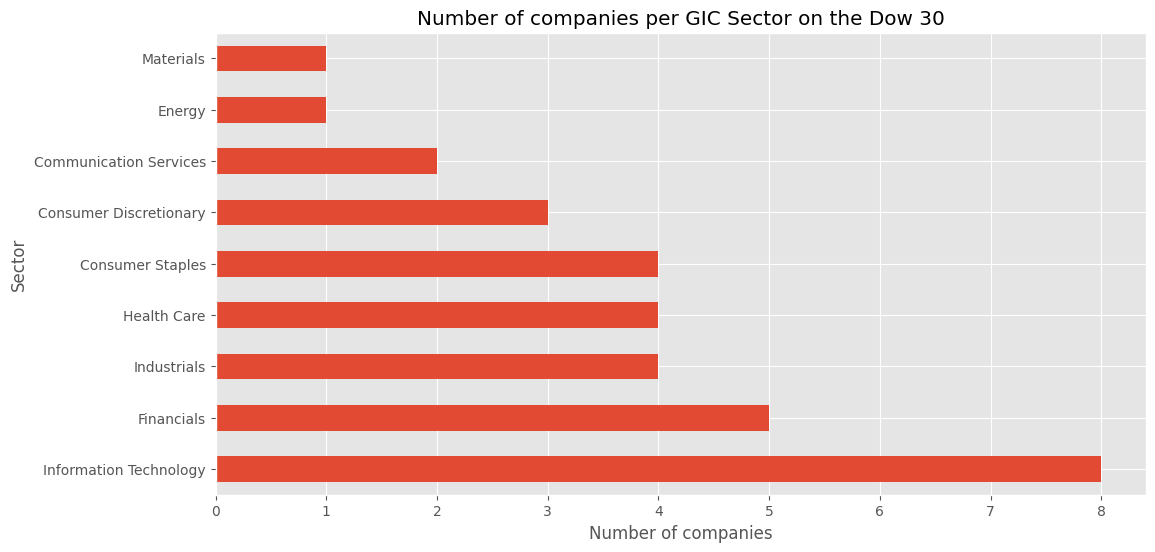

In [21]:
# Plot a simple horizontal bar chart of categorical data using matplotlib (be sure you have imported the matplotlib library as plt)
df.GIC_Sector.value_counts().plot(kind="barh")
plt.title("Number of companies per GIC Sector on the Dow 30")
plt.xlabel("Number of companies")
plt.ylabel("Sector")
plt.show()

In [29]:
# Analyze a numeric variable (company_pulse)
df.company_pulse.describe()

count    32.000000
mean      0.061101
std       0.183931
min      -0.240495
25%      -0.075403
50%       0.045384
75%       0.181682
max       0.412882
Name: company_pulse, dtype: float64

In [ ]:
# Plot a histogram of the company pulse data

TypeError: barh() missing 1 required positional argument: 'width'

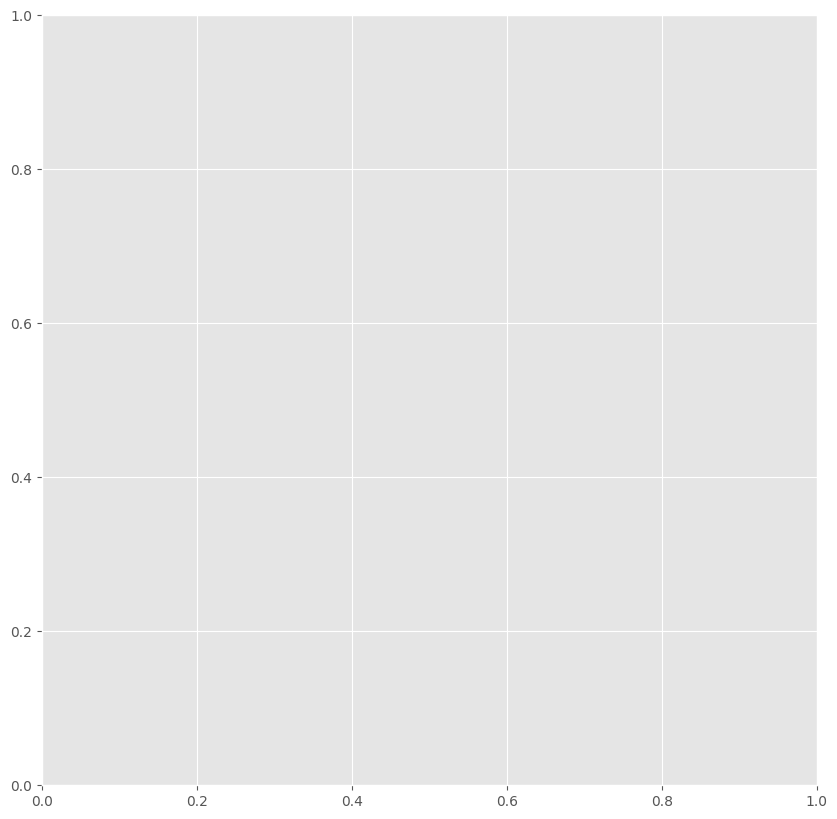

In [28]:
# Make a jazzier bar chart, still using matplotlib; thanks to Andy McDonald https://medium.com/towards-data-science/7-steps-to-help-you-make-your-matplotlib-bar-charts-beautiful-f87419cb14cb

# Set up fig and ax variables which will be set to plt.subplots(; then, within this function, can pass in figure size)
# Create a variable called "bars" and assign it to plt.bar()

df1 = df.GIC_Sector.value_counts().sort_values()
fig, ax = plt.subplots(figsize=(10,10))
bars = plt.barh(df1)
ax.spines[['right', "top", "bottom"]].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars)
plt.show